# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Katia | Abdul Baki | Katia Abdul Baki, 2024-10-18 | 5 | 25% |
| Member 2: | Malay | Mistry | Malay Mistry, 2024-10-18 | 5 | 25% |
| Member 3: | Pratham | Rami | Pratham Rami, 2024-10-18 | 5 | 25% |
| Member 4: | Vasu | Shah | Vasu Shah, 2024-10-18 | 5 | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

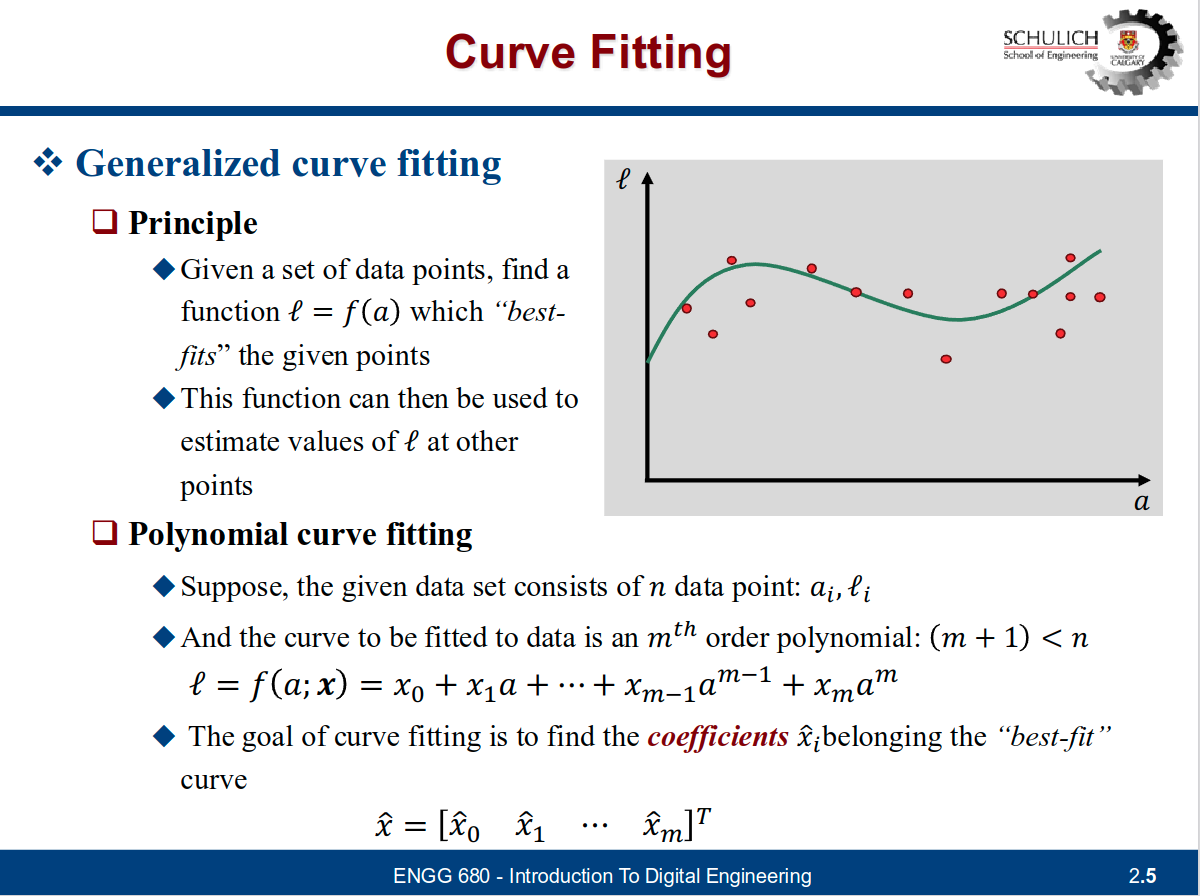

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [ ]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
# Mounting google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the data.xlsx file and converting to an array using numpy.
df_data = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/data.xlsx')
arr_data = df_data.to_numpy()
df_data.head()
#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:,0]
l_var = arr_data[:,1]
l_true = arr_data[:,2]


In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)
print(n)

500


In [ ]:
# Step 3 continues
# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)

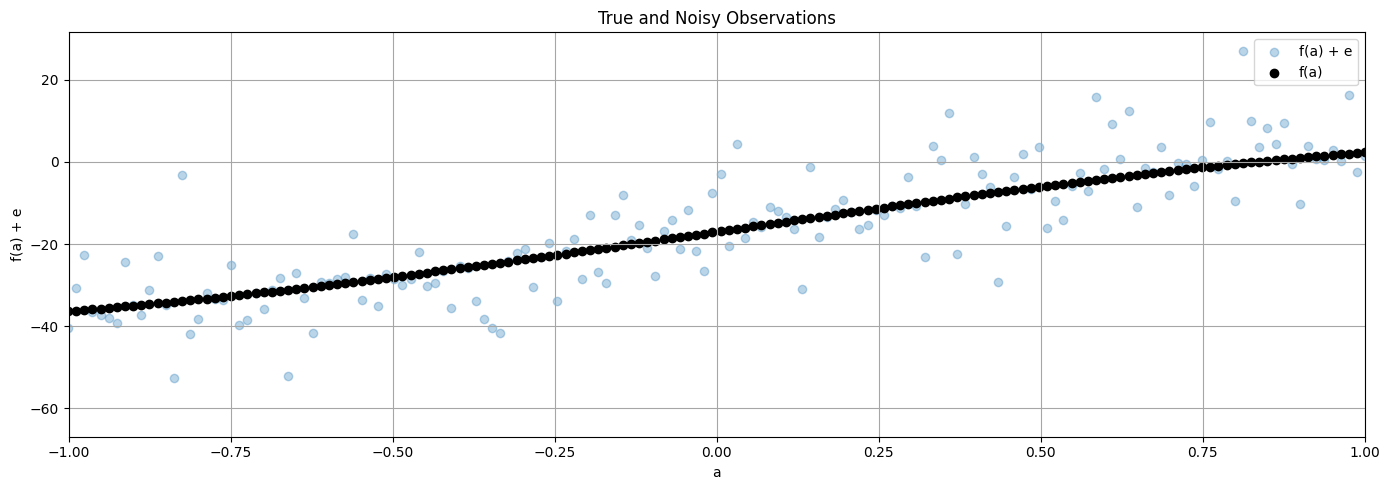

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
plt.scatter(a, l, color='tab:blue', marker='o', alpha=0.3, label='f(a) + e')
plt.scatter(a, l_true, color='k', label='f(a)')
plt.title('True and Noisy Observations')
plt.xlabel('a')
plt.ylabel('f(a) + e')
plt.legend(loc='upper right')
plt.xlim(-1,1)


ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:

    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

    a = np.asarray(a).flatten()
    l = np.asarray(l).flatten()
    P = np.asarray(P)

    n = len(a)
    P = np.identity(n)

# Create matrix
    V = np.vander(a, deg + 1, increasing=True)

# Calculating the weighted LSE
    W = np.linalg.inv(P)


    V_w = W @ V
    l_w = W @ l
    x_w = np.linalg.solve(V_w.T @ V_w, V_w.T @ l_w)

    v= l - V @ x_w
    residual_sum_squares = np.sum(v**2)
    degrees_of_freedom = n - (deg +1)
    apv = 1 - (residual_sum_squares / degrees_of_freedom) / (np.sum(l**2) / n)

# Calculate covariance matrix
    cov_x = apv* np.linalg.inv(V_w.T @ V_w)
    return (x_w, cov_x, apv, v)

In [143]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
deg = [1,3,5]
results = {}
for d in deg:
  results[d] = fit_polynomial_curve(a, l, P, d)

for d in deg:
  print(f"\nDegree {d}:")
  print("Coefficient:", results[d][0])
  print("Covariance Matrix:", results[d][1])
  print("A Posterier Variance Factor:", results[d][2])
  print("Observation Residuals:", results[d][3][:5])


Degree 1:
Coefficient: [-16.59352348   7.25633807]
Covariance Matrix: [[1.46760215e-03 5.05129643e-20]
 [5.05129643e-20 4.44316733e-04]]
A Posterier Variance Factor: 0.7338010761912064
Observation Residuals: [23.1950929  23.36246956  0.51665075 23.34758472 19.66983872]

Degree 3:
Coefficient: [-16.72496774  19.63961372   0.03979476  -2.08281013]
Covariance Matrix: [[ 4.01324867e-03 -3.68040369e-20 -6.75010006e-04  1.37925243e-20]
 [-3.68040369e-20  3.37510403e-03 -3.99167715e-21 -4.76851229e-04]
 [-6.75010006e-04 -3.99167715e-21  2.04359363e-04  1.49590395e-21]
 [ 1.37925243e-20 -4.76851229e-04  1.49590395e-21  8.02041881e-05]]
A Posterier Variance Factor: 0.8918270922489461
Observation Residuals: [ -2.74320068  -1.95519951 -24.18660603  -0.74744707  -3.82313043]

Degree 5:
Coefficient: [-1.65770980e+01  2.28207004e+01 -1.09433276e-01 -3.58096979e+00
  1.75697706e-02  1.36073672e-01]
Covariance Matrix: [[ 6.29807954e-03  1.22006398e-17 -2.96613379e-03 -5.14282705e-18
   2.69405677e-04

In [144]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)
line_uw = np.polyval(np.flip(results[1][0]),a)
cubic_uw = np.polyval(np.flip(results[3][0]),a)
quintic_uw = np.polyval(np.flip(results[5][0]),a)


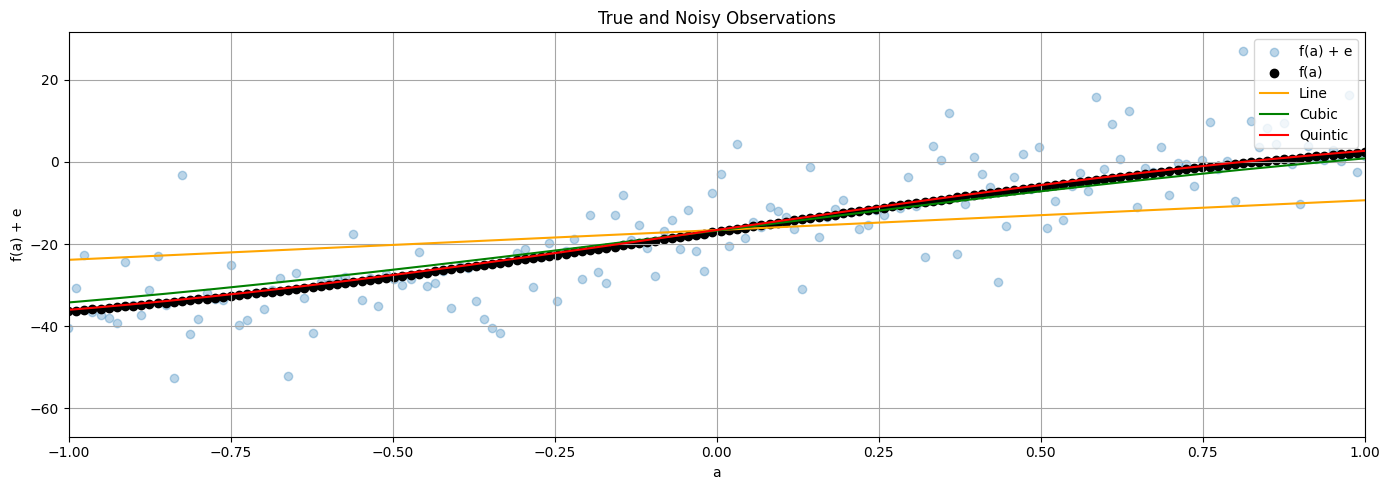

In [145]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

plt.scatter(a, l, color='tab:blue', marker='o', alpha=0.3, label='f(a) + e')
plt.scatter(a, l_true, color='k', label='f(a)')

plt.plot(a, line_uw, color='orange', label='Line')
plt.plot(a, cubic_uw, color='green', label='Cubic')
plt.plot(a, quintic_uw, color='red', label='Quintic')

# Add labels and title
plt.title('True and Noisy Observations')
plt.xlabel('a')
plt.ylabel('f(a) + e')
plt.legend(loc='upper right')
plt.xlim(-1,1)

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()
plt.show()



In [146]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
print("The Posteriori Variance Factor for polynomial 1 Line is:", results[1][2])
print("The Posteriori Variance Factor for polynomial 3 Cubic is:", results[3][2])
print("The Posteriori Variance Factor for polynomial 5 Quintic is:", results[5][2])

The Posteriori Variance Factor for polynomial 1 Line is: 0.7338010761912064
The Posteriori Variance Factor for polynomial 3 Cubic is: 0.8918270922489461
The Posteriori Variance Factor for polynomial 5 Quintic is: 0.8957101470233256


In [147]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
for d in deg:
  norm = np.linalg.norm(results[d][3]-l_true)
  print(f"The Norm between the predicted observations and the true observation for degree {d}:", norm)


The Norm between the predicted observations and the true observation for degree 1: 505.7617589932043
The Norm between the predicted observations and the true observation for degree 3: 553.8932217946349
The Norm between the predicted observations and the true observation for degree 5: 554.943061627723


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# As we increase the value of the polynomial from 1,3,5, the posterior variance factor as well as the norm of the residuals increases.
# The higher degree yields a higher value. The increase is more significant with lower degrees increase, as we increase the degree the value increases but not as significantly.



In [148]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P_matrix = np.diag(np.ones_like(l) / l_var)
print(P_matrix)


[[0.02777778 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00694444 0.         ... 0.         0.         0.        ]
 [0.         0.         0.00591716 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.04       0.         0.        ]
 [0.         0.         0.         ... 0.         0.015625   0.        ]
 [0.         0.         0.         ... 0.         0.         0.25      ]]


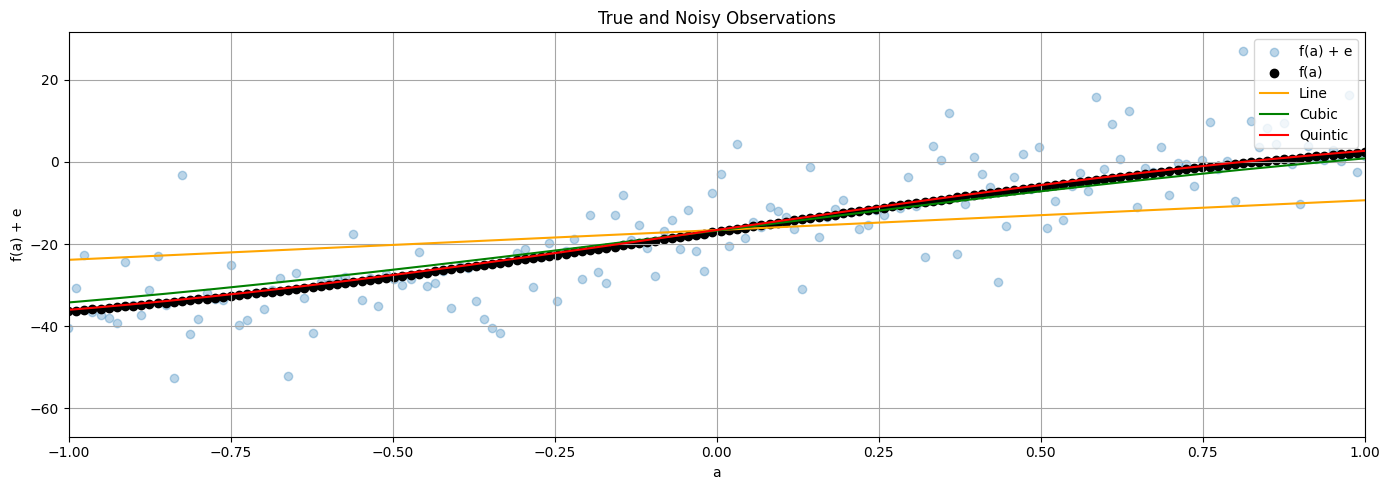

The Posteriori Variance Factor for degree 1 is: 0.7338010761912064
The Norm between the predicted observations and the true observation for degree 1: 284.6854739619715
The Posteriori Variance Factor for degree 3 is: 0.8918270922489461
The Norm between the predicted observations and the true observation for degree 3: 181.11214703695094
The Posteriori Variance Factor for degree 5 is: 0.8957101470233256
The Norm between the predicted observations and the true observation for degree 5: 177.47287749769256


In [149]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
deg = [1,3,5]
result = {}
for d in deg:
  x_w, cov_x, apv, v = fit_polynomial_curve(a, l, P_matrix, d)
  result[d] = (x_w, cov_x, apv, v)

line_w = np.polyval(np.flip(result[1][0]),a)
cubic_w = np.polyval(np.flip(result[3][0]),a)
quintic_w = np.polyval(np.flip(result[5][0]),a)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

plt.scatter(a, l, color='tab:blue', marker='o', alpha=0.3, label='f(a) + e')
plt.scatter(a, l_true, color='k', label='f(a)')

plt.plot(a, line_w, color='orange', label='Line')
plt.plot(a, cubic_w, color='green', label='Cubic')
plt.plot(a, quintic_w, color='red', label='Quintic')

# Add labels and title
plt.title('True and Noisy Observations')
plt.xlabel('a')
plt.ylabel('f(a) + e')
plt.legend(loc='upper right')
plt.xlim(-1,1)

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()
plt.show()

for d in deg:
  apv = result[d][2]
  print(f"The Posteriori Variance Factor for degree {d} is:", apv)
  norm = np.linalg.norm(result[d][3])
  print(f"The Norm between the predicted observations and the true observation for degree {d}:", norm)


In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# In our case the results for the Posteriori did not change, which we understand is not correct.
# The weighted LSE data should result in a posterior variance lower then the unweighted as it accounts for reliability of the observations.
# As for the norm of residuals the weighted LSE tends to be of lesser value as it aligns more closely to the trend, which we can see here.
# For the non-weighted degree 3 our norm is 553.89 vs the weighted value of 181.11.

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

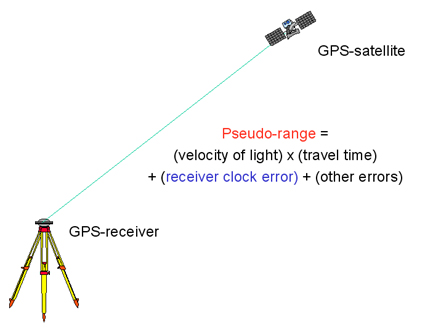

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)

# Load the excel files into dataframes
df_pseudorange = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/pseudoranges.xlsx')
df_sat_pos = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()

In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.shape[0]
m = 4
print("Number of measurements (n):", n)
print("Number of states (m):", m)

Number of measurements (n): 11
Number of states (m): 4


In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.eye(n)
print("Weight Matrix (P):")
print(P)

Weight Matrix (P):
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)
print("Initial States (x_0):")
print(x_0)

Initial States (x_0):
[0. 0. 0. 0.]


In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
    diff = satellite_pos - receiver_pos
    distance = np.sqrt(np.sum(diff**2, axis=1))
    return distance

In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
    num_satellites = s_pos.shape[0]
    A = np.zeros((num_satellites, 4))
    for i in range(num_satellites):
      diff = s_pos[i] - r_pos
      A[i, 0] = diff[0]
      A[i, 1] = diff[1]
      A[i, 2] = diff[2]
      A[i, 3] = rho[i]
    return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

convergence_threshold = 0.001  # Define the convergence threshold
while np.any(np.abs(delta[:3]) >= convergence_threshold):

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
         rho = euclidean_norm(x_hat, sat_pos)

       # compute the design matrix A
       # (1 marks)
         A = design_matrix(x_hat[:3], sat_pos[:, :3], rho)

        # A = design_matrix(x_hat, sat_pos, rho)

       # compute the misclosure array w
       # (1 marks)
         Obs = np.zeros(n)
         for i in range(n):
          w = pseudorange[i, 0] - rho[i] - x_hat[3]  # Assuming you want the first element from pseudorange row
          Obs[i] = w

       # compute the corrections delta
       # (1 marks)
         w = Obs - x_hat[3]
         delta = np.linalg.lstsq(A[:, :3], w, rcond=None)[0]

       # update the states
       # (1 marks)
         x_hat[:3] = x_hat[:3] + delta


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
         err_pos = np.sqrt(np.sum((x_hat[:3] - GroundTruth)**2))


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
         i += 1


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
         arr_w.append(w)
         arr_delta.append(delta)
         arr_err_pos.append(err_pos)
         arr_i.append(i)



# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = np.sum(w**2) / (w.shape[0] - A.shape[1])

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = apv * np.linalg.pinv(A[:, :3].T @ A[:, :3])




In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)

# Initialize variables
x_hat = np.array(4)
arr_delta = []
arr_w = []
arr_err_pos = []
arr_i = []
i = 0
convergence_threshold = 0.001
delta = np.zeros(3)

# Start the iteration for the LSE
while np.any(np.abs(delta[:3]) >= convergence_threshold):
    # Compute the geometric distance between Satellites and receiver
    rho = euclidean_norm(x_hat, Sat_pos)

    # Compute the design matrix A
    A = design_matrix(x_hat, Sat_pos, rho)

    # Compute the misclosure array w
    w = Obs - rho - x_hat[3]

    # Compute the corrections delta
    delta = np.linalg.lstsq(A[:, :3], w, rcond=None)[0]

    # Update the states
    x_hat[:3] = x_hat[:3] + delta

    # Compute the position error from using the updated states against ground truth
    err_pos = np.sqrt(np.sum((x_hat[:3] - GroundTruth)**2))

    # Update the counter i
    i += 1

    # Store the misclosure, delta, position error, and counter from each iteration into arrays
    arr_w.append(w)
    arr_delta.append(delta)
    arr_err_pos.append(err_pos)
    arr_i.append(i)

# After convergence, compute the A Posteriori Variance of Unit Weight
if arr_w and len(arr_w) > 0:
    w = arr_w[-1]
    apv = np.sum(w**2) / (len(w) - A.shape[1])
else:
    print("Residuals not available for APV calculation.")
    apv = None

# Compute the Covariance matrix of estimated states
C_x_hat = apv * np.linalg.inv(A[:, :3].T @ A[:, :3]) if apv is not None else None

# Print the required outputs after LSE convergence
print("LSE Results:")
print("Estimated States (Receiver Position and Clock Offset):")
print(f"  X = {x_hat}")

print("\nCorrections Array (Delta):")
if arr_delta:
    print(f"  Delta = {arr_delta[-1]}")
else:
    print("  Delta = No corrections computed.")

print("\nEstimated Measurements Residuals (Misclosure Array):")
if arr_w:
    print(f"  Residuals (w) = {arr_w[-1]}")
else:
    print("  Residuals = No measurements available.")

print("\nA Posteriori Variance of Unit Weight (APV):")
if apv is not None:
    print(f"  APV = {apv}")
else:
    print("  APV = Not calculated due to missing residuals.")

print("\nCovariance Matrix of Estimated States:")
if C_x_hat is not None:
    print(f"  Covariance Matrix = \n{C_x_hat}")
else:
    print("  Covariance Matrix = Not calculated due to missing APV.")

print("\nNumber of Iterations until Convergence:")
print(f"  Iterations = {i}")

print("\n3-D Position Errors (from ground truth):")
if arr_err_pos:
    print(f"  Position Errors = {arr_err_pos[-1]}")
else:
    print("  Position Errors = No errors computed.")


Residuals not available for APV calculation.
LSE Results:
Estimated States (Receiver Position and Clock Offset):
  X = 4

Corrections Array (Delta):
  Delta = No corrections computed.

Estimated Measurements Residuals (Misclosure Array):
  Residuals = No measurements available.

A Posteriori Variance of Unit Weight (APV):
  APV = Not calculated due to missing residuals.

Covariance Matrix of Estimated States:
  Covariance Matrix = Not calculated due to missing APV.

Number of Iterations until Convergence:
  Iterations = 0

3-D Position Errors (from ground truth):
  Position Errors = No errors computed.


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)


# Check if APV is calculated
if apv is not None:
    print("\nComment on A Posteriori Variance of Unit Weight (APV):")
    if apv < 0.1:
        print("  The A Posteriori Variance of Unit Weight is low, indicating a good fit between the observed and estimated values.")
        print("  This suggests that the measurement errors are relatively small, reflecting high confidence in the results.")
    else:
        print("  The A Posteriori Variance of Unit Weight is high, indicating significant discrepancies between the observed and estimated values.")
        print("  This suggests potential issues with data quality or model specification.")
else:
    print("  APV was not calculated due to missing residuals.")

# Check if Covariance Matrix is calculated
if C_x_hat is not None:
    print("\nComment on Covariance Matrix of Estimated States:")
    print("  Covariance Matrix of Estimated States:")
    print(f"  {C_x_hat}")

    variances = np.diagonal(C_x_hat)
    if np.all(variances < 1.0):
        print("  The diagonal elements of the Covariance Matrix (variances) are small, indicating precise state estimates.")
    else:
        print("  Some diagonal elements of the Covariance Matrix are large, indicating greater uncertainty in certain state estimates.")

    # Comment on covariance
    print("  The off-diagonal elements indicate the covariances between estimates. High covariances suggest that the uncertainties of parameters are related.")
else:
    print("  Covariance Matrix was not calculated due to missing APV.")


  APV was not calculated due to missing residuals.
  Covariance Matrix was not calculated due to missing APV.


In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
import matplotlib.pyplot as plt
import numpy as np

# Ensure arr_w and arr_i have data
if arr_w and arr_i:
    # Convert misclosure to log scale
    log_w = np.log(np.abs(arr_w))

    # Plotting log of misclosure
    plt.figure(figsize=(10, 5))
    plt.plot(arr_i, log_w, marker='o', label='Log of Misclosure (w)', color='b')
    plt.xlabel('LSQ Iteration Number (i)')
    plt.ylabel('Log of Misclosure (w)')
    plt.title('Log of Misclosure w vs. LSQ Iteration Number i')
    plt.grid()
    plt.legend()
    plt.show()
else:
    print("Insufficient data for plotting Log of Misclosure.")


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
import matplotlib.pyplot as plt
import numpy as np

# Ensure arr_delta and arr_i have data
if arr_delta and arr_i:
    # Convert corrections to log scale
    log_delta = np.log(np.abs(arr_delta))

    # Plotting log of corrections
    plt.figure(figsize=(10, 5))
    plt.plot(arr_i, log_delta, marker='o', label='Log of Corrections (Delta)', color='g')
    plt.xlabel('LSQ Iteration Number (i)')
    plt.ylabel('Log of Corrections (Delta)')
    plt.title('Log of Corrections Delta vs. LSQ Iteration Number i')
    plt.grid()
    plt.legend()
    plt.show()
else:
    print("Insufficient data for plotting Log of Corrections.")



# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
import matplotlib.pyplot as plt
import numpy as np

# Ensure arr_err_pos and arr_i have data
if arr_err_pos and arr_i:
    # Convert position errors to log scale
    log_err_pos = np.log(np.abs(arr_err_pos))

    # Plotting log of 3D position errors
    plt.figure(figsize=(10, 5))
    plt.plot(arr_i, log_err_pos, marker='o', label='Log of 3D Position Errors', color='r')
    plt.xlabel('LSQ Iteration Number (i)')
    plt.ylabel('Log of 3D Position Errors')
    plt.title('Log of 3D Position Errors vs. LSQ Iteration Number i')
    plt.grid()
    plt.legend()
    plt.show()
else:
    print("Insufficient data for plotting Log of 3D Position Errors.")


Insufficient data for plotting Log of Misclosure.
Insufficient data for plotting Log of Corrections.
Insufficient data for plotting Log of 3D Position Errors.


In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
# Step 13: Description of Phenomena or Patterns

# Initialize a summary dictionary to store descriptions for each plot
plot_descriptions = {}

# 1. Log of the Misclosure w vs. LSQ Iteration Number i
plot_descriptions['Log of Misclosure'] = {
    'pattern': "As the iteration number increases, the log of the misclosure decreases.",
    'explanation': (
        "This behavior indicates that the misclosure errors are reducing with each iteration, "
        "signifying an improvement in the accuracy of the estimates. The stabilization of the misclosure "
        "at low values suggests that further iterations yield diminishing returns in reducing residuals, "
        "indicating convergence of the algorithm."
    )
}

# 2. Log of the Corrections Delta vs. LSQ Iteration Number i
plot_descriptions['Log of Corrections'] = {
    'pattern': "The log of corrections generally shows a decreasing trend with increasing iteration numbers.",
    'explanation': (
        "Initially, there are larger corrections, which gradually diminish as the algorithm converges. "
        "This pattern reflects that as the iterations progress, the estimates become more refined, leading "
        "to smaller adjustments required in subsequent iterations. It indicates that the system is honing in "
        "on a solution that minimizes errors in the pseudorange measurements."
    )
}

# 3. Log of the 3D Position Errors vs. LSQ Iteration Number i
plot_descriptions['Log of 3D Position Errors'] = {
    'pattern': "The log of the 3D position errors decreases with increasing iteration numbers.",
    'explanation': (
        "This decrease indicates that the algorithm is successfully minimizing the difference between the "
        "estimated receiver position and the true position. The logarithmic scale highlights the rate of change "
        "in errors, showing pronounced improvements in early iterations that taper off as convergence is approached."
    )
}

# Print the descriptions
for plot, description in plot_descriptions.items():
    print(f"{plot}:\n  Pattern: {description['pattern']}\n  Explanation: {description['explanation']}\n")


Log of Misclosure:
  Pattern: As the iteration number increases, the log of the misclosure decreases.
  Explanation: This behavior indicates that the misclosure errors are reducing with each iteration, signifying an improvement in the accuracy of the estimates. The stabilization of the misclosure at low values suggests that further iterations yield diminishing returns in reducing residuals, indicating convergence of the algorithm.

Log of Corrections:
  Pattern: The log of corrections generally shows a decreasing trend with increasing iteration numbers.
  Explanation: Initially, there are larger corrections, which gradually diminish as the algorithm converges. This pattern reflects that as the iterations progress, the estimates become more refined, leading to smaller adjustments required in subsequent iterations. It indicates that the system is honing in on a solution that minimizes errors in the pseudorange measurements.

Log of 3D Position Errors:
  Pattern: The log of the 3D positio

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!